In [ ]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSafNIcpUOz5AvPzM5MXxHrBSxqOS4jPiGp0FDXAuiFp51DaRiSeV5nY46CFa5VaPKjkgv2zfsUL7Sn/pub?output=csv'
X = pd.read_csv(url)
X = X.values

In [ ]:
# Implementación K-Means Manual

import random

# Definimos la distancia Mahalanobis
from scipy.spatial import distance

cov = np.cov(X.T)
cov_inv = np.linalg.inv(cov)

def mahalanobis(x, c):
    return distance.mahalanobis(x, c, cov_inv)

# variable de inicializacion
k = 4 # número de cluster
dimension = X.shape[0] # núero de puntos
centroids = X[random.sample(range(dimension), k)] # Centroides iniciales
centroids

# Almacenamiento de etiquetas
clusters_manuales = np.zeros(dimension)

# Almacenamiento de distancias
distancias = np.zeros((dimension,k))

# Implementación del método
tol = 1e-6
error = 100

# Repetir hats que los centroides dejen de moverse seiginificativamente
while error > tol:

    # Calcular las distancias de cada punto a cada centroide
    for i in range(dimension):
      for j in range(k):
        distancias[i,j] = mahalanobis(X[i], centroids[j])
      clusters_manuales[i] = np.argmin(distancias[i])

    # Almacenar los centroids previos antes de actualizarlos
    centroids_previos = np.copy(centroids)

    # Actualizar los centroides
    for l in range(k): # Iteramos sobre los clusters (k=4)
        puntos_cluster = X[clusters_manuales == l]
        # Si el cluster no está vacio, recalcular el centroide.
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0) # Promedia los puntos que pertenecen al cluster, columna por columna.
        else:
          print(f'cluster {l} vacio, reasignando centroide aleatoriamente')
          centroids[l] = X[random.choice(range(dimension))]
    # Calcular el error como el cambio en los centroides
    error = np.mean([mahalanobis(centroids[l], centroids_previos[l]) for l in range(k)])
    print(error)

5.415919395886896
0.7926180935174139
0.46567627704021514
0.2897753136149782
0.20850377295070524
0.1829962971002267
0.17076247335332978
0.1721000071323043
0.17516017802698372
0.19173754741407106
0.17637795014514773
0.1888127210688272
0.2243949469111009
0.1778115408444126
0.06620552197699954
0.03767433798645653
0.020804296122594067
0.017462622338565548
0.016887262110420576
0.016827270111890266
0.014393811936918025
0.016231186038532536
0.01841632822289356
0.020315566921037254
0.01991491809648854
0.01988575339944869
0.0182737502972737
0.01686465314807665
0.0135283420138168
0.009723804388324729
0.008305732390904349
0.006258487676106589
0.0054055771600070735
0.003113334900955617
0.0024795275590076896
0.0023526084135697192
0.0025347897224612713
0.002454326650382612
0.0024163657339907325
0.0015886577130505915
0.0014505415840584124
0.001127746066973505
0.0012729288257661464
0.001193804487159844
0.0010233071915661087
0.0010795291442719237
0.0


In [ ]:
# Definimos las librerías
from sklearn.decomposition import PCA

# Crear un objeto PCA y ajustar los datos de las tres principales componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [ ]:
# Verificamos la varianza de los datos
varianza = pca.explained_variance_ratio_
print(sum(varianza))

0.8397093998660171


In [ ]:
clusters_manuales

array([3., 3., 1., ..., 3., 1., 1.])

In [ ]:
# Actualización de los centroides con PCA

centroids = np.array(centroids)
centroids = pca.transform(centroids)

In [ ]:
# Definimos la función de gráfica de clusters y centroides 2D

def graficar_clusters_PCA2D(clusters, metodo, centroids):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='deep',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()


In [ ]:
# Definimos la función de gráfica de clusters y centroides 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(cluster,metodo):
    #Crear el grafico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

   #Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0],X_pca[:, 1],X_pca[:, 2],
                         c=cluster,cmap='viridis', s=100,
                        edgecolor ='white',alpha = 0.6)
    #Etiquetas de los ejes y titulo
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) (metodo)', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    #Añadir leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title = "Clusters")
    ax.add_artist(legend1)

    #Mostrar grafico
    plt.show()

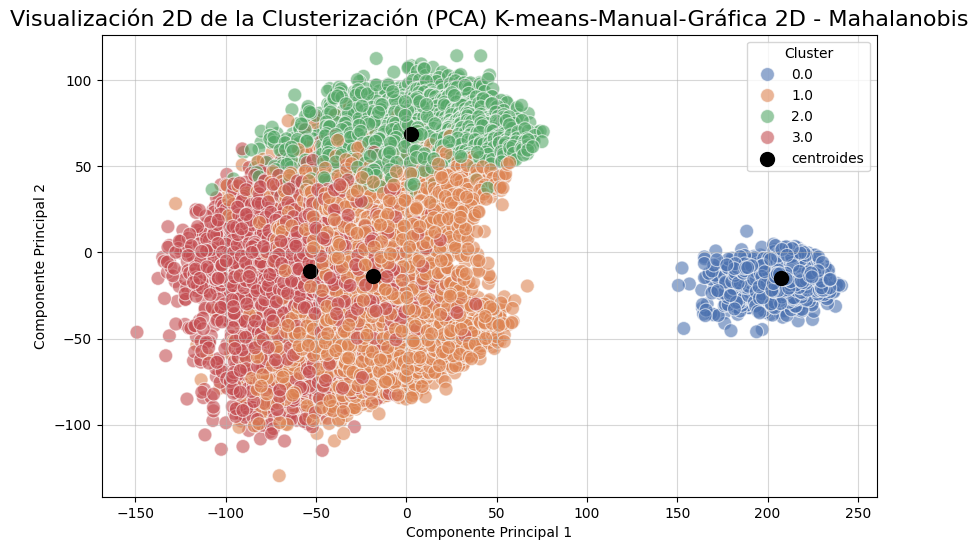

In [ ]:
k_means_sklearn_2D = graficar_clusters_PCA2D(clusters_manuales, 'K-means-Manual-Gráfica 2D - Mahalanobis', centroids)

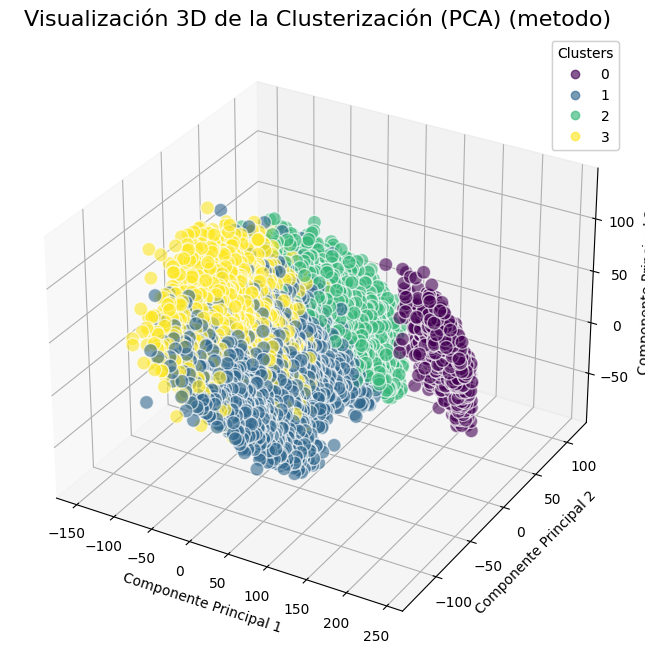

In [ ]:
k_means_sklearn_3D = graficar_clusters_PCA3D(clusters_manuales, 'K-means-Manual-Gráfica 3D- Mahalanobis')